In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_2.9_update.csv')
df
for c in df.columns:
    print(c)

CASRN
DSSTOX_COMPOUND_ID
DSSTOX_SUBSTANCE_ID
PREFERRED_NAME
QC_LEVEL
Original_SMILES
Number of connected components
Canonical_QSARr
InChI_Code_QSARr
InChI Key_QSARr
Salt_Solvent
Salt_Solvent_ID
value_point_estimate
unit
pub_source_name
CASRN_Arr[0]
CASRN_Arr[1]
CASRN_Arr[2]
DSSTOX_SUBSTANCE_ID_Arr[0]
DSSTOX_SUBSTANCE_ID_Arr[1]
DSSTOX_SUBSTANCE_ID_Arr[2]


In [7]:
#read in /localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf using rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
mols_25 = []
mols = []
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf'):
    mols.append(mol)
    if mol.GetProp('VP Temperature') == '25':
        mols_25.append(mol)
print(len(mols),len(mols_25))

2819 2368


In [11]:
mols_25
#make a df with some info on these: name, smiles, vp, temp, and a column for the mols
smiles = []
temps = []
vps = []
for mol in mols_25:
    smiles.append(Chem.MolToSmiles(mol))
    temps.append(mol.GetProp('VP Temperature'))
    vps.append(mol.GetProp('LogVP'))
df = pd.DataFrame({'SMILES':smiles,'Temp':temps,'VP':vps,'Mol':mols_25})
df

,SMILES,Temp,VP,Mol
0,CC(O)C(=O)O,25,-1.0898998391363903,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de500>
1,O=C(O)c1c(Cl)ccc(Cl)c1Cl,25,-3.259600199653834,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de5e0>
2,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,25,-8.26039996917038,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de650>
3,COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C,25,-6.719000740988102,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de6c0>
4,O=C(O)c1cccc(Cl)c1Cl,25,-3.6420994407594938,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de730>
...,...,...,...,...
2363,FCC(F)(F)OC(F)F,25,2.5682005502965386,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbd80>
2364,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,25,-7.400099469202588,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbdf0>
2365,OCCOc1ccc(N=Nc2ccccc2)cc1,25,-7.674899125794308,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbe60>
2366,Brc1ccc2c(c1)Oc1ccccc1O2,25,-4.522900460547318,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbed0>


In [15]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
df['standardized_smiles'] = df.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)

[13:55:24] Initializing MetalDisconnector
[13:55:24] Running MetalDisconnector
[13:55:24] Initializing Normalizer
[13:55:24] Running Normalizer
[13:55:24] Running LargestFragmentChooser
[13:55:24] Fragment: CC(O)C(=O)O
[13:55:24] New largest fragment: CC(O)C(=O)O (12)
[13:55:24] Running Uncharger
[13:55:24] Initializing MetalDisconnector
[13:55:24] Running MetalDisconnector
[13:55:24] Initializing Normalizer
[13:55:24] Running Normalizer
[13:55:24] Initializing MetalDisconnector
[13:55:24] Running MetalDisconnector
[13:55:24] Initializing Normalizer
[13:55:24] Running Normalizer
[13:55:24] Running LargestFragmentChooser
[13:55:24] Fragment: O=C(O)c1c(Cl)ccc(Cl)c1Cl
[13:55:24] New largest fragment: O=C(O)c1c(Cl)ccc(Cl)c1Cl (15)
[13:55:24] Running Uncharger
[13:55:24] Initializing MetalDisconnector
[13:55:24] Running MetalDisconnector
[13:55:24] Initializing Normalizer
[13:55:24] Running Normalizer
[13:55:24] Initializing MetalDisconnector
[13:55:24] Running MetalDisconnector
[13:55:24] 

In [25]:
import numpy as np
#rename VP to VP log mmHg
df = df.rename(columns={'VP':'VP log mmHg'})
#convert log mmHg to mmHg
df['VP mmHg'] = df['VP log mmHg'].apply(lambda x: 10**float(x))
#convert mmHg to Pa
df['VP Pa'] = df['VP mmHg'].apply(lambda x: x*133.322)
#convert Pa to logPa
df['VP logPa'] = df['VP Pa'].apply(lambda x: np.log10(x))
#drop VP log mmHg and VP mmHg
df = df.drop(columns=['VP Pa','VP mmHg'])
df

,SMILES,Temp,VP log mmHg,Mol,standardized_smiles,VP logPa
0,CC(O)C(=O)O,25,-1.0898998391363903,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de500>,CC(O)C(=O)O,1.035002
1,O=C(O)c1c(Cl)ccc(Cl)c1Cl,25,-3.259600199653834,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de5e0>,O=C(O)c1c(Cl)ccc(Cl)c1Cl,-1.134698
2,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,25,-8.26039996917038,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de650>,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,-6.135498
3,COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C,25,-6.719000740988102,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de6c0>,COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C,-4.594099
4,O=C(O)c1cccc(Cl)c1Cl,25,-3.6420994407594938,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de730>,O=C(O)c1cccc(Cl)c1Cl,-1.517198
...,...,...,...,...,...,...
2363,FCC(F)(F)OC(F)F,25,2.5682005502965386,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbd80>,FCC(F)(F)OC(F)F,4.693102
2364,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,25,-7.400099469202588,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbdf0>,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,-5.275198
2365,OCCOc1ccc(N=Nc2ccccc2)cc1,25,-7.674899125794308,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbe60>,OCCOc1ccc(N=Nc2ccccc2)cc1,-5.549997
2366,Brc1ccc2c(c1)Oc1ccccc1O2,25,-4.522900460547318,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbed0>,Brc1ccc2c(c1)Oc1ccccc1O2,-2.397999


In [18]:
df_features =  pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/Current_set_2980_all_features_vp_in_log10_Pa.csv')
df_feauture_essentials = df_features[['molregno','vp_log10pa','Source','standardized_smiles','NumHeavyAtoms']]

(array([1.775e+03, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

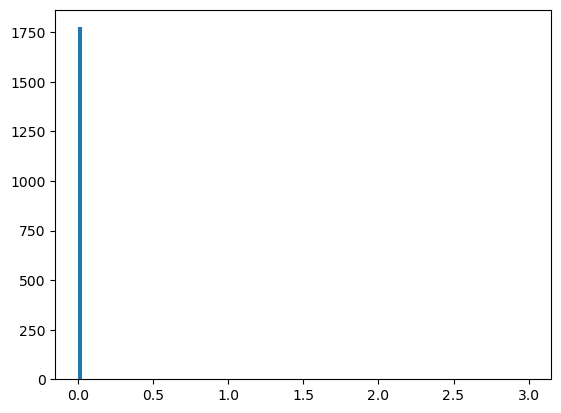

In [31]:
#merge on standardized smiles
df_merged = pd.merge(df, df_feauture_essentials, how='inner', on='standardized_smiles')
df_merged
#make column with difference between vp from opera and vp from chembl
df_merged['Abs diff opera'] = abs(df_merged['VP logPa'].astype(float) - df_merged['vp_log10pa'].astype(float))
#plot this difference
import matplotlib.pyplot as plt
plt.hist(df_merged['Abs diff opera'],bins=100)


In [35]:
df_merged = df_merged.sort_values(by=['Abs diff opera'],ascending=False)
df_merged.head(25)

,SMILES,Temp,VP log mmHg,Mol,standardized_smiles,VP logPa,molregno,vp_log10pa,Source,NumHeavyAtoms,Abs diff opera
216,c1ccc(-c2ccccc2)cc1,25,-2.0490999106336125,<rdkit.Chem.rdchem.Mol object at 0x7f88a118b990>,c1ccc(-c2ccccc2)cc1,0.075802,424,3.075547,REACH,12,2.999745
1729,Cc1ccn2nc(S(=O)(=O)Nc3c(F)cccc3F)nc2n1,25,-11.5560005105457,<rdkit.Chem.rdchem.Mol object at 0x7f88a11c5230>,Cc1ccn2nc(S(=O)(=O)Nc3c(F)cccc3F)nc2n1,-9.431099,70,-12.000000,REACH,22,2.568901
1342,CCNc1nc(Cl)nc(NC(C)C)n1,25,-6.539100654496979,<rdkit.Chem.rdchem.Mol object at 0x7f88a11b2d50>,CCNc1nc(Cl)nc(NC(C)C)n1,-4.414199,4013,-6.096910,REACH,14,1.682711
1185,CCOP(C)(=O)OCC,25,-1.8760993812141034,<rdkit.Chem.rdchem.Mol object at 0x7f88a11aca50>,CCOP(C)(=O)OCC,0.248802,2863,1.747116,OCHEM,9,1.498313
633,O=C(c1ccccc1)C(O)c1ccccc1,25,-4.185999486581153,<rdkit.Chem.rdchem.Mol object at 0x7f88a1197a00>,O=C(c1ccccc1)C(O)c1ccccc1,-2.061098,2275,-3.533132,REACH,16,1.472035
117,O=[N+]([O-])OCC(CO[N+](=O)[O-])(CO[N+](=O)[O-]...,25,-8.263600310252617,<rdkit.Chem.rdchem.Mol object at 0x7f88a1187a00>,O=[N+]([O-])OCC(CO[N+](=O)[O-])(CO[N+](=O)[O-]...,-6.138698,2787,-4.741559,OCHEM,21,1.397139
856,C1CSCCS1,25,-0.09690024149214271,<rdkit.Chem.rdchem.Mol object at 0x7f88a11a0eb0>,C1CSCCS1,2.028002,4035,1.025269,OCHEM,6,1.002733
1612,CNC(=O)N(C)c1nnc(C(C)(C)C)s1,25,-5.699000406013823,<rdkit.Chem.rdchem.Mol object at 0x7f88a11be490>,CNC(=O)N(C)c1nnc(C(C)(C)C)s1,-3.574099,3978,-4.397977,OCHEM,15,0.823878
304,Cc1ccc(C(C)C)cc1,25,-0.4570499190981219,<rdkit.Chem.rdchem.Mol object at 0x7f88a118f060>,Cc1ccc(C(C)C)cc1,1.667852,440,2.300993,PUBCHEM,10,0.633141
286,CC(C)(C)c1ccc(O)cc1,25,-1.4194000118410193,<rdkit.Chem.rdchem.Mol object at 0x7f88a118e650>,CC(C)(C)c1ccc(O)cc1,0.705502,2514,0.088217,PUBCHEM,11,0.617284


In [34]:
abs_difs = df_merged['Abs diff opera'].tolist()
len([d for d in abs_difs if d > 1])

7

In [37]:
df_merged_full = pd.merge(df, df_features, how='inner', on='standardized_smiles')
df_merged_full

,SMILES_x,Temp,VP log mmHg,Mol,standardized_smiles,VP logPa,confid,molregno,mdfp,NumHeavyAtoms,...,standardized_smiles_x,logp,logp_metadata,vp_log10pa,vp_metadata,SMILES_y,hash_code,Temperature,Vapour Pressure (log10 kPa),Source
0,CC(O)C(=O)O,25,-1.0898998391363903,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de500>,CC(O)C(=O)O,1.035002,3482,3484,"[6, 1, 0, 3, 0, 0, 0, 0, 0, 0, 27.628109366789...",6,...,C[C@H](O)C(=O)O,0,{},1.034997,"{'SMILES': '[CH3]-[CH](-[OH])-[C](=[O])-[OH]',...",[CH3]-[CH](-[OH])-[C](=[O])-[OH],c2dc1c3c7278f8021ff0aa1ce43f592c,298.15,-1.965003,OCHEM
1,O=C(O)c1c(Cl)ccc(Cl)c1Cl,25,-3.259600199653834,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de5e0>,O=C(O)c1c(Cl)ccc(Cl)c1Cl,-1.134698,3611,3613,"[12, 1, 0, 2, 0, 0, 0, 3, 0, 0, -140.407874176...",12,...,O=C(O)c1c(Cl)ccc(Cl)c1Cl,0,{},-1.134735,{'SMILES': '[O]=[C](-[OH])-[c]1:[c](-[Cl]):[cH...,[O]=[C](-[OH])-[c]1:[c](-[Cl]):[cH]:[cH]:[c](-...,cd55b69de6194de9cbcbccd414f32196,298.15,-4.134735,OCHEM
2,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,25,-8.26039996917038,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de650>,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,-6.135498,2840,2842,"[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14.85458232170...",20,...,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,0,{},-6.135526,{'SMILES': '[cH]1:[cH]:[cH]:[c]2:[c](:[cH]:1):...,[cH]1:[cH]:[cH]:[c]2:[c](:[cH]:1):[cH]:[c]1:[c...,8e47cc941edcf011a936af5193c14a78,298.15,-9.135526,OCHEM
3,O=C(O)c1cccc(Cl)c1Cl,25,-3.6420994407594938,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de730>,O=C(O)c1cccc(Cl)c1Cl,-1.517198,2886,2888,"[11, 1, 0, 2, 0, 0, 0, 2, 0, 0, -96.9363231611...",11,...,O=C(O)c1cccc(Cl)c1Cl,0,{},-1.517163,{'SMILES': '[O]=[C](-[OH])-[c]1:[cH]:[cH]:[cH]...,[O]=[C](-[OH])-[c]1:[cH]:[cH]:[cH]:[c](-[Cl]):...,9174f92c0154d8265b31502a36447b56,298.15,-4.517163,OCHEM
4,O=C(O)c1cc(Cl)cc(Cl)c1Cl,25,-3.507200512265382,<rdkit.Chem.rdchem.Mol object at 0x7f88a16de810>,O=C(O)c1cc(Cl)cc(Cl)c1Cl,-1.382299,3601,3603,"[12, 1, 0, 2, 0, 0, 0, 3, 0, 0, -119.515111007...",12,...,O=C(O)c1cc(Cl)cc(Cl)c1Cl,0,{},-1.382338,{'SMILES': '[O]=[C](-[OH])-[c]1:[cH]:[c](-[Cl]...,[O]=[C](-[OH])-[c]1:[cH]:[c](-[Cl]):[cH]:[c](-...,cc3cd6da16db2611643511e8d35d7d09,298.15,-4.382338,OCHEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,COCC(F)(F)C(F)C(F)(F)F,25,1.7852999317382818,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbca0>,COCC(F)(F)C(F)C(F)(F)F,3.910202,2165,1021,"[12, 3, 0, 1, 6, 0, 0, 0, 0, 0, -8.00417978157...",12,...,COCC(F)(F)[C@H](F)C(F)(F)F,0,{},3.910232,{'SMILES': '[CH3]-[O]-[CH2]-[C](-[F])(-[F])-[C...,[CH3]-[O]-[CH2]-[C](-[F])(-[F])-[CH](-[F])-[C]...,559af79983f5d056801525bba2cae5f3,298.15,0.910232,OCHEM
1799,FCC(F)(F)OC(F)F,25,2.5682005502965386,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbd80>,FCC(F)(F)OC(F)F,4.693102,4039,4041,"[9, 3, 0, 1, 5, 0, 0, 0, 0, 0, -115.0851775466...",9,...,FCC(F)(F)OC(F)F,0,{},4.693104,{'SMILES': '[F]-[CH2]-[C](-[F])(-[F])-[O]-[CH]...,[F]-[CH2]-[C](-[F])(-[F])-[O]-[CH](-[F])-[F],ef7906840c4e5c2e3b8e5b8a7cc50ef3,298.15,1.693104,OCHEM
1800,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,25,-7.400099469202588,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbdf0>,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,-5.275198,3457,3459,"[17, 0, 0, 1, 0, 0, 0, 4, 0, 0, 20.87325810977...",17,...,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,0,{},-5.275215,{'SMILES': '[Cl]-[c]1:[cH]:[c]2:[c](:[o]:[c]3:...,[Cl]-[c]1:[cH]:[c]2:[c](:[o]:[c]3:[c](-[Cl]):[...,c10f2c4a79db5b145233cfd2a9d04bda,298.15,-8.275215,OCHEM
1801,Brc1ccc2c(c1)Oc1ccccc1O2,25,-4.522900460547318,<rdkit.Chem.rdchem.Mol object at 0x7f88a11cbed0>,Brc1ccc2c(c1)Oc1ccccc1O2,-2.397999,1475,330,"[15, 0, 0, 2, 0, 0, 0, 0, 1, 0, 84.02508003605...",15,...,Brc1ccc2c(c1)Oc1ccccc1O2,0,{},-2.397977,{'SMILES': '[Br]-[c]1:[cH]:[cH]:[c]2:[c](:[cH]...,[Br]-[c]1:[cH]:[cH]:[c]2:[c](:[cH]:1)-[O]-[c]1...,1bfaffafb9c5aebbb710251114e2d971,298.15,-5.397977,OCHEM


In [51]:
#okay, now I actually want to look at prediction error of only 2d vs only mdfp per mol, and look at the difference
from sklearn.utils import shuffle

df = df_merged_full
params = { #hyperparameters optimized by ShuZe Wang
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
import numpy as np
from sklearn.model_selection import GroupKFold, KFold
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
gkf = GroupKFold(n_splits=5)
RDKit_feature_names = pd.read_pickle('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/outputs/RDKit_2D_descriptors.pkl')
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI', 'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
combined_features = RDKit_feature_names + mdfp_features_all
y = df['vp_log10pa']  
params = params
output = ([],[],[],[],[],[])
selection_2d_features = RDKit_feature_names


for i in range(3):

    print(f'Fold shuffle {i+1} of 3')
    shuffled_data = shuffle(df, random_state=i)

    X_mdfp = shuffled_data[mdfp_features_all]
    X_mdfp = StandardScaler().fit_transform(X_mdfp)
    X_2d = shuffled_data[selection_2d_features]
    X_2d = StandardScaler().fit_transform(X_2d)
    x_combined = shuffled_data[combined_features]
    x_combined = StandardScaler().fit_transform(x_combined)
    y = shuffled_data['VP logPa'].to_numpy()
    molregno_df = shuffled_data['molregno'].to_numpy()
    confid_df = shuffled_data['confid'].to_numpy()

    for fold, (train_idx, test_idx) in enumerate(gkf.split(shuffled_data, groups=shuffled_data['molregno'])):

        #get the train and test data
        X_train_mdfp = X_mdfp[train_idx]
        X_test_mdfp = X_mdfp[test_idx]
        X_train_2d = X_2d[train_idx]
        X_test_2d = X_2d[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        X_train_combined = x_combined[train_idx]
        X_test_combined = x_combined[test_idx]

        molregnos_test = molregno_df[test_idx]
        confids_test = confid_df[test_idx]






        # Create DMatrix for training and testing
        dtrain_mdfp = xgb.DMatrix(X_train_mdfp, label=y_train)
        dtest_mdfp = xgb.DMatrix(X_test_mdfp, label=y_test)

        dtrain_2d = xgb.DMatrix(X_train_2d, label=y_train)
        dtest_2d = xgb.DMatrix(X_test_2d, label=y_test)

        dtrain_combined = xgb.DMatrix(X_train_combined, label=y_train)
        dtest_combined = xgb.DMatrix(X_test_combined, label=y_test)


        model_mdfp = xgb.train(
            params,
            dtrain_mdfp,
            num_boost_round=999,
            evals=[(dtest_mdfp, "Test")],
            early_stopping_rounds=10,
            verbose_eval=False

        )

        model_2d = xgb.train(
            params,
            dtrain_2d,
            num_boost_round=999,
            evals=[(dtest_2d, "Test")],
            early_stopping_rounds=10,
            verbose_eval=False

        )

        model_combined = xgb.train(
            params,
            dtrain_combined,
            num_boost_round=999,
            evals=[(dtest_combined, "Test")],
            early_stopping_rounds=10,
            verbose_eval=False

        )

        pp_mdfp = model_mdfp.predict(dtest_mdfp)
        pp_2d = model_2d.predict(dtest_2d)
        pp_combined = model_combined.predict(dtest_combined)

        output[0].append(y_test)
        output[1].append(pp_mdfp)
        # molregnos_test = df['molregno'].iloc[test_idx]
        # confids_test = df['confid'].iloc[test_idx]
        
        output[2].append(molregnos_test)
        output[3].append(confids_test)
        output[4].append(pp_2d)
        output[5].append(pp_combined)

        rmse_mdfp = np.sqrt(mean_squared_error(y_test, pp_mdfp, squared=False))
        rmse_2d = np.sqrt(mean_squared_error(y_test, pp_2d, squared=False))
        rmse_combined = np.sqrt(mean_squared_error(y_test, pp_combined, squared=False))
        print(f"Fold {fold + 1}: MDFP RMSE = {rmse_mdfp}, 2D RMSE = {rmse_2d}, combined RMSE = {rmse_combined}")



Fold shuffle 1 of 3
Fold 1: MDFP RMSE = 1.0162592407301854, 2D RMSE = 0.8960719829307285, combined RMSE = 0.9242948799312714
Fold 2: MDFP RMSE = 1.0049694368470286, 2D RMSE = 0.9651386539721875, combined RMSE = 0.974169940520116
Fold 3: MDFP RMSE = 0.9982495067655853, 2D RMSE = 0.9371673275580374, combined RMSE = 0.9574808855516721
Fold 4: MDFP RMSE = 0.958890095896831, 2D RMSE = 0.9451637323988592, combined RMSE = 0.919101147762963
Fold 5: MDFP RMSE = 1.0501620669281344, 2D RMSE = 0.9875777356677026, combined RMSE = 0.9817594243100933
Fold shuffle 2 of 3
Fold 1: MDFP RMSE = 1.0162592407301854, 2D RMSE = 0.8960719829307285, combined RMSE = 0.9242948799312712
Fold 2: MDFP RMSE = 1.0049694368470286, 2D RMSE = 0.9651386539721875, combined RMSE = 0.974169940520116
Fold 3: MDFP RMSE = 0.9982495067655852, 2D RMSE = 0.9371673275580374, combined RMSE = 0.9574808855516721
Fold 4: MDFP RMSE = 0.958890095896831, 2D RMSE = 0.9451637323988592, combined RMSE = 0.919101147762963
Fold 5: MDFP RMSE = 1

In [109]:
for i in range(3):

    print(f'Fold shuffle {i+1} of 3')
    shuffled_data = shuffle(df, random_state=i)
    X_mdfp = shuffled_data[mdfp_features_all]
    X_mdfp = StandardScaler().fit_transform(X_mdfp)
    X_2d = shuffled_data[selection_2d_features]
    X_2d = StandardScaler().fit_transform(X_2d)
    x_combined = shuffled_data[combined_features]
    x_combined = StandardScaler().fit_transform(x_combined)
    y = shuffled_data['VP logPa'].to_numpy()
    molregno_df = shuffled_data['molregno'].to_numpy()
    confid_df = shuffled_data['confid'].to_numpy()

    for fold, (train_idx, test_idx) in enumerate(gkf.split(shuffled_data, groups=shuffled_data['molregno'])):
        molregnos_test = molregno_df[test_idx]
        #sort 
        molregnos_test.sort()
        print(molregnos_test[:5])

Fold shuffle 1 of 3
[ 8 18 23 32 39]
[ 9 19 25 34 41]
[ 1 11 20 35 43]
[12 21 26 36 44]
[13 22 24 28 37]
Fold shuffle 2 of 3
[ 8 18 23 32 39]
[ 9 19 25 34 41]
[ 1 11 20 35 43]
[12 21 26 36 44]
[13 22 24 28 37]
Fold shuffle 3 of 3
[ 8 18 23 32 39]
[ 9 19 25 34 41]
[ 1 11 20 35 43]
[12 21 26 36 44]
[13 22 24 28 37]


In [115]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
shuffled_data = shuffle(df, random_state=i)
X_mdfp = shuffled_data[mdfp_features_all]
X_mdfp = StandardScaler().fit_transform(X_mdfp)
X_2d = shuffled_data[selection_2d_features]
X_2d = StandardScaler().fit_transform(X_2d)
x_combined = shuffled_data[combined_features]
x_combined = StandardScaler().fit_transform(x_combined)
y = shuffled_data['VP logPa'].to_numpy()
molregno_df = shuffled_data['molregno'].to_numpy()
confid_df = shuffled_data['confid'].to_numpy()
for fold, (train_idx, test_idx) in enumerate(rkf.split(df)):
    if fold%5 == 0:
        print(f'Repeat {fold/5} of 3')
    molregnos_test = molregno_df[test_idx]
    #sort 
    molregnos_test.sort()
    print(molregnos_test[:5])

Repeat 0.0 of 3
[ 1 11 24 25 36]
[ 8  9 20 23 28]
[12 18 19 34 35]
[13 21 22 26 32]
[43 45 70 74 76]
Repeat 1.0 of 3
[ 1 13 22 28 51]
[23 32 46 53 58]
[ 9 11 21 25 34]
[ 8 19 20 24 44]
[12 18 26 35 37]
Repeat 2.0 of 3
[18 19 28 34 39]
[ 9 11 22 23 32]
[12 20 44 45 59]
[ 8 13 21 26 47]
[ 1 24 25 35 41]


In [92]:
y_test_nested = output[0]
pp_mdfp_nested = output[1]
molregnos_test_nested = output[2]
confids_test_nested = output[3]
pp_2d_nested = output[4]
pp_combined_nested = output[5]

df_template = pd.DataFrame({'Prediction': [], 'Experimental': [], 'molregno': [], 'confid': [], 'fold': []})
df_mdfp = df_template.copy()
df_2d = df_template.copy()
df_combined = df_template.copy()

for fold in range(len(y_test_nested)):
    df_mdfp = pd.concat([df_mdfp, pd.DataFrame({'Prediction': pp_mdfp_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
    df_2d = pd.concat([df_2d, pd.DataFrame({'Prediction': pp_2d_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
    df_combined = pd.concat([df_combined, pd.DataFrame({'Prediction': pp_combined_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
    


/tmp/ipykernel_3729317/3431721356.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_mdfp = pd.concat([df_mdfp, pd.DataFrame({'Prediction': pp_mdfp_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
/tmp/ipykernel_3729317/3431721356.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2d = pd.concat([df_2d, pd.DataFrame({'Prediction': pp_2d_nested[fold], 'Experimental': y_test_nested[fold], 'mo

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

def getStatValues_v2(x,y,treshold=1):
    RMSE = mean_squared_error(np.array(x), np.array(y), squared=False)
    MAE = mean_absolute_error(np.array(x), np.array(y))
    EBO = np.mean(np.abs(np.array(x) - np.array(y)) < treshold)
    KT = stats.kendalltau(x, y)[0]
    #add coefficient of determination
    r2 = r2_score(np.array(x), np.array(y))



    return RMSE, MAE, EBO, KT, r2
    

def density_plot_multiple_custom(reals, predictions,molregnos, print_stats=True, bounds=None, titles=None,global_title=None,print_spearman=False):
    num_plots = len(reals)
    print(f'making {num_plots} plots')
    num_cols = min(num_plots, 3)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed for the grid
    #if you cant devide by 3, but can divide by 2, do two rows
    if num_plots % 3 != 0 and num_plots % 2 == 0:
        num_rows = 2
        num_cols = 2   
    if num_plots == 4:
        num_rows = 2
        num_cols = 2
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D
    
    for i in range(num_plots):
        print(f'plot {i+1} of {num_plots}')
        real = reals[i]
        prediction = predictions[i]
        rmses,maes,ebos,kts,r2s = [],[],[],[],[]
        for r,p in zip(real,prediction):
            RMSE, MAE, EBO, KT,R2 = getStatValues_v2(r, p)
            rmses.append(RMSE)
            maes.append(MAE)
            ebos.append(EBO)
            kts.append(KT)
            r2s.append(R2)

        rmse_90_low,rmse_90_high = stats.norm.interval(confidence=0.90, 
                 loc=np.mean(rmses), 
                 scale=stats.sem(rmses)) 
        rmse_mean = np.mean(rmses)
        mae_90_low,mae_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(maes), 
                    scale=stats.sem(maes))
        mae_mean = np.mean(maes)
        ebo_90_low,ebo_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(ebos), 
                    scale=stats.sem(ebos))
        ebo_mean = np.mean(ebos)
        kt_90_low,kt_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(kts), 
                    scale=stats.sem(kts))
        kt_mean = np.mean(kts)

        r2_90_low,r2_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(r2s), 
                    scale=stats.sem(r2s))
        r2_mean = np.mean(r2s)
        
                                             
        molregno = molregnos[i]

        mrn = [item for sublist in molregno for item in sublist]
        real = [item for sublist in real for item in sublist]
        prediction = [item for sublist in prediction for item in sublist]
        # #make df of these three, and average over molregno
        df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
        df = df.groupby('molregno').mean()
        real = df['real'].tolist()
        prediction = df['prediction'].tolist()


        print(f'{len(real)} points')
        
        ax = axes[i]
        
        if bounds is None:
            lower = min(prediction + real) - 2
            upper = max(prediction + real) + 2
        else:
            lower = bounds[0]
            upper = bounds[1]
        
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')
        import statsmodels.api as sm
        dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
        z = dens_u.pdf([real, prediction])

        sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

        ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
        ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
        ax.grid(True, which="both")
        ax.axis([lower, upper, lower, upper])
        # ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMAE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})', transform=ax.transAxes, fontsize=10, verticalalignment='top')
        text_box = ax.text(0.05, 0.25, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMAE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})\nR2: {r2_mean:.2f} ({r2_90_low:.2f}-{r2_90_high:.2f})', transform=ax.transAxes, fontsize=10, verticalalignment='top',
                    # transform=ax.transAxes, fontsize=10, verticalalignment='top',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
        
        if titles is not None and len(titles) > i:
            ax.set_title(titles[i], fontsize=14)
        ax.set_aspect('equal', 'box')
    
    # Remove any unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])
    if global_title is not None:
        fig.suptitle(global_title, fontsize=16)
    
    # plt.tight_layout()
    plt.savefig('../tmp_data/physchem_vs_mdfp.png', dpi=600)
    plt.show()

making 3 plots
plot 1 of 3
1803 points
plot 2 of 3
1803 points
plot 3 of 3
1803 points


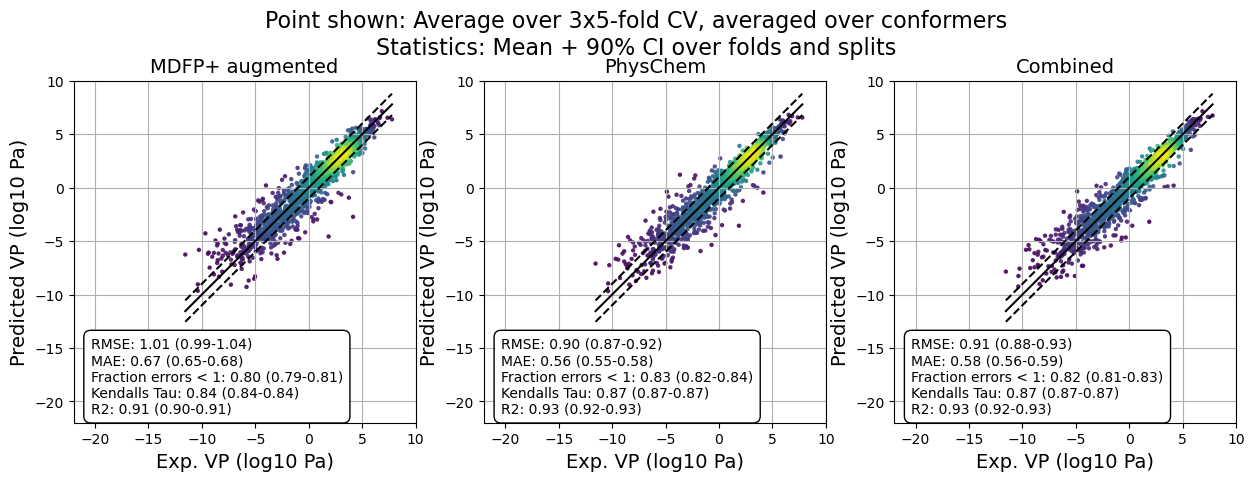

In [54]:
#make nested lists for pred and real, nested by split index
preds_mdfp_nested, preds_2d_nested, preds_combined_nested = [], [], []
test_y_mdfp_nested, test_y_2d_nested, test_y_combined_nested = [], [], []
molregnos_mdfp_nested, molregnos_2d_nested, molregnos_combined_nested = [], [], []

for i in range(len(y_test_nested)):
    df_preds_mdfp_split = df_mdfp[df_mdfp['fold'] == i]
    df_preds_2d_split = df_2d[df_2d['fold'] == i]
    df_preds_combined_split = df_combined[df_combined['fold'] == i]


    preds_mdfp = df_preds_mdfp_split['Prediction'].tolist()
    preds_2d = df_preds_2d_split['Prediction'].tolist()
    preds_combined = df_preds_combined_split['Prediction'].tolist()

    test_mdfp = df_preds_mdfp_split['Experimental'].tolist()
    test_2d = df_preds_2d_split['Experimental'].tolist()
    test_combined = df_preds_combined_split['Experimental'].tolist()

    molregnos_mdfp = df_preds_mdfp_split['molregno'].tolist()
    molregnos_2d = df_preds_2d_split['molregno'].tolist()
    molregnos_combined = df_preds_combined_split['molregno'].tolist()


    preds_mdfp_nested.append(preds_mdfp)
    preds_2d_nested.append(preds_2d)
    preds_combined_nested.append(preds_combined)

    test_y_mdfp_nested.append(test_mdfp)
    test_y_2d_nested.append(test_2d)
    test_y_combined_nested.append(test_combined)

    molregnos_mdfp_nested.append(molregnos_mdfp)
    molregnos_2d_nested.append(molregnos_2d)
    molregnos_combined_nested.append(molregnos_combined)



pred_nested = [preds_mdfp_nested, preds_2d_nested, preds_combined_nested]
real_nested = [test_y_mdfp_nested, test_y_2d_nested, test_y_combined_nested]
molregnos_nested = [molregnos_mdfp_nested, molregnos_2d_nested, molregnos_combined_nested]
titles = ['MDFP+ augmented','PhysChem','Combined']
density_plot_multiple_custom(real_nested, pred_nested, molregnos=molregnos_nested,titles=titles,bounds = [-22,10], print_stats=False,global_title="Point shown: Average over 3x5-fold CV, averaged over conformers\nStatistics: Mean + 90% CI over folds and splits")

In [77]:
#make df of these three, and average over molregno
preds_mdfp_flat = [item for sublist in preds_mdfp_nested for item in sublist]
preds_2d_flat = [item for sublist in preds_2d_nested for item in sublist]
preds_combined_flat = [item for sublist in preds_combined_nested for item in sublist]
real_mdfp_flat = [item for sublist in test_y_mdfp_nested for item in sublist]
real_2d_flat = [item for sublist in test_y_2d_nested for item in sublist]
real_combined_flat = [item for sublist in test_y_combined_nested for item in sublist]
molregnos_mdfp_flat = [item for sublist in molregnos_mdfp_nested for item in sublist]
molregnos_2d_flat = [item for sublist in molregnos_2d_nested for item in sublist]
molregnos_combined_flat = [item for sublist in molregnos_combined_nested for item in sublist]
df_mdfp = pd.DataFrame({'molregno': molregnos_mdfp_flat, 'real': real_mdfp_flat, 'prediction': preds_mdfp_flat})
df_2d = pd.DataFrame({'molregno': molregnos_2d_flat, 'real': real_2d_flat, 'prediction': preds_2d_flat})
df_combined = pd.DataFrame({'molregno': molregnos_combined_flat, 'real': real_combined_flat, 'prediction': preds_combined_flat})
#merge on molregno
df_merged = pd.merge(df_mdfp, df_2d, how='inner', on='molregno')
df_merged = pd.merge(df_merged, df_combined, how='inner', on='molregno')
df_merged = df_merged.rename(columns={'real_x':'real_mdfp','prediction_x':'prediction_mdfp','real_y':'real_2d','prediction_y':'prediction_2d','real':'real_combined','prediction':'prediction_combined'})
df_merged
#drop real_mdfp and real_2d, rename real_combined to experimental
df_merged = df_merged.drop(columns=['real_mdfp','real_2d'])
df_merged = df_merged.rename(columns={'real_combined':'experimental'})
df_merged.head(50)

,molregno,prediction_mdfp,prediction_2d,experimental,prediction_combined
0,3344.0,0.966182,1.887143,2.120502,1.039379
1,3344.0,0.966182,1.887143,2.120502,1.039379
2,3344.0,0.966182,1.887143,2.120502,1.039379
3,3344.0,0.966182,1.887143,2.120502,1.039379
4,3344.0,0.966182,1.887143,2.120502,1.039379
5,3344.0,0.966182,1.887143,2.120502,1.039379
6,3344.0,0.966182,1.887143,2.120502,1.039379
7,3344.0,0.966182,1.887143,2.120502,1.039379
8,3344.0,0.966182,1.887143,2.120502,1.039379
9,3344.0,0.966182,1.887143,2.120502,1.039379


KstestResult(statistic=0.12869620729060813, pvalue=1.1229275829506593e-16, statistic_location=-0.5800000000000001, statistic_sign=-1)

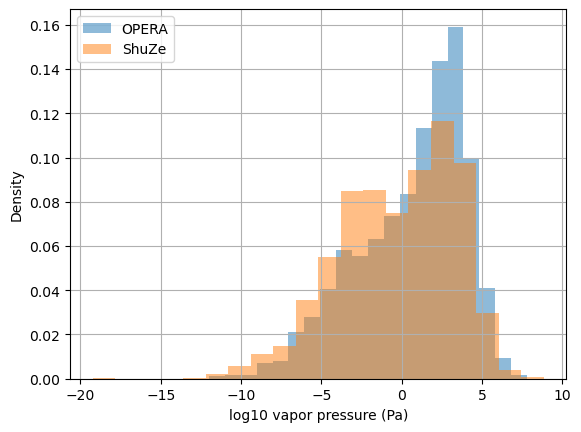

In [68]:
#do overlaying histograms of vapor pressure in this set and in df_features
df_merged_full['vp_log10pa'].hist(bins=20, alpha=0.5,density = True, label='OPERA')
df_features['vp_log10pa'].hist(bins=20, alpha=0.5,density = True, label='ShuZe')
plt.legend()
plt.xlabel('log10 vapor pressure (Pa)')
plt.ylabel('Density')
#are they significantly different? do KS test
from scipy.stats import ks_2samp
ks_2samp(df_merged_full['vp_log10pa'],df_features['vp_log10pa'])

Text(0, 0.5, 'count')

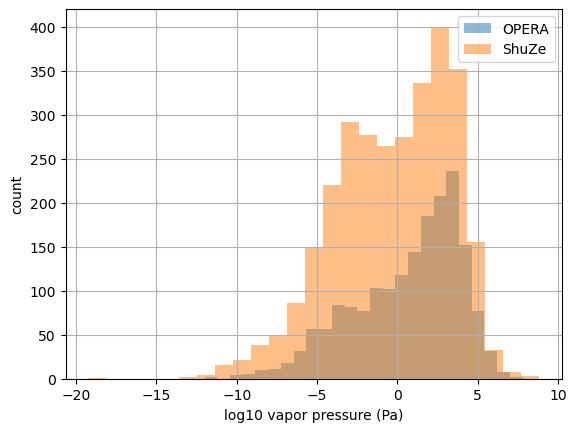

In [70]:
df_merged_full['vp_log10pa'].hist(bins=25, alpha=0.5,density = False, label='OPERA')
df_features['vp_log10pa'].hist(bins=25, alpha=0.5,density = False, label='ShuZe')
plt.legend()
plt.xlabel('log10 vapor pressure (Pa)')
plt.ylabel('count')

In [72]:
#how many in df_features with vp_log10pa < -5?
print(len(df_features[df_features['vp_log10pa'] < -5]))
print(len(df[df['vp_log10pa'] < -5]))


318
128


In [55]:
#and if we do the same split?


,confid,molregno,mdfp,NumHeavyAtoms,NumRotatableBonds,NumN,NumO,NumF,NumP,NumS,...,logp,logp_metadata,vp_log10pa,vp_metadata,SMILES,hash_code,Temperature,Vapour Pressure (log10 kPa),Source,standardized_smiles
0,2298,1,"[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.4462820500696...",6,0,0,0,0,0,0,...,0,{},4.100855,"{'SMILES': '[cH]1:[cH]:[cH]:[cH]:[cH]:[cH]:1',...",[cH]1:[cH]:[cH]:[cH]:[cH]:[cH]:1,60c5fa2eb3046aca250f27ede97fbe7a,298.15,1.100855,PUBCHEM;OCHEM,c1ccccc1
1,1228,6,"[30, 19, 0, 6, 0, 0, 0, 0, 0, 0, 110.748466359...",30,19,0,6,0,0,0,...,0,{},-11.744727,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,000c0dc393452e54c19cae2c6501b956,298.15,-14.744727,REACH,CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[...
2,1150,7,"[9, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7.3614322526332...",9,5,0,0,0,0,0,...,0,{},2.698933,{'SMILES': '[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-...,[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-...,0026cd05c00286506e4c0051abcde83f,298.15,-0.301067,PUBCHEM,CC=CCCCCCC
3,1151,8,"[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97.7987770071...",13,1,0,2,0,0,0,...,0,{},-3.053323,{'SMILES': '[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2...,[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[...,0029fb907f0382cb8ba7913301e791ec,298.15,-6.053323,OCHEM,O=C(O)c1ccc2ccccc2c1
4,1152,9,"[5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.4848459757350...",5,2,0,1,0,0,0,...,0,{},3.591625,"{'SMILES': '[Cl]-[CH2]-[O]-[CH2]-[Cl]', 'Sourc...",[Cl]-[CH2]-[O]-[CH2]-[Cl],0050ebd8f62aa0dd9dd972b02e277f5b,298.15,0.591625,OCHEM,ClCOCCl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,4238,4240,"[18, 2, 0, 1, 0, 0, 0, 0, 5, 0, -20.9569257949...",18,2,0,1,0,0,0,...,0,{},-4.301899,{'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...,[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c](-[O]-[c]2:...,ff30c14ff5df02fc6b4207673283ed0b,298.15,-7.301899,OCHEM,Brc1c(Br)c(Br)c(Oc2ccccc2)c(Br)c1Br
2976,4239,4241,"[17, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0.034004099168...",17,0,0,1,0,0,0,...,0,{},-5.356584,{'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...,[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]:[c]3:[c](-[...,ff3ac5bdeb6e4683f822395b116dda7f,298.15,-8.356584,OCHEM,Clc1cc(Cl)c2oc3c(Cl)c(Cl)ccc3c2c1
2977,4240,4242,"[19, 2, 0, 1, 0, 0, 0, 6, 0, 0, -30.8042543707...",19,2,0,1,0,0,0,...,0,{},-3.770000,{'SMILES': '[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:...,[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:[cH]:[c](-[C...,ff4e979f0b36ff50fd00e1edd51b6f76,298.15,-6.770000,OCHEM,Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1
2978,4241,4243,"[5, 0, 0, 0, 3, 0, 0, 1, 0, 0, -0.004587864253...",5,0,0,0,3,0,0,...,0,{},6.457729,"{'SMILES': '[F]-[C](-[F])(-[F])-[Cl]', 'Source...",[F]-[C](-[F])(-[F])-[Cl],ff58752f0a4348832f35917fb8a400b7,298.15,3.457729,OCHEM,FC(F)(F)Cl


In [56]:
#just for fun: what if we train on only these?